The necessary imports

In [1]:
from ipythonblocks import BlockGrid
from colour import Color

A function to generate a list of colours starting with white for zero, black for one, and then a gradient from red for two up to blue for n

In [2]:
def generate_colormap(n):
    red = Color("red")
    blue = Color("blue")
    white = Color("white")
    black = Color("black")
    return [(c.red*255,c.green*255,c.blue*255) 
         for c in [white]+[black]+list(red.range_to(blue,n-2))]

# Visualising groups

In [3]:
n = 7
def action(a, b):
    return (a + b)%n

Addition modulo 7


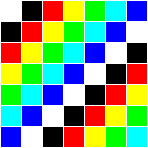

In [4]:
colormap = generate_colormap(n)
size_of_blocks = 20

grid = BlockGrid(n,n,(255,255,255),size_of_blocks)
for block in grid:
    block.rgb = colormap[action(block.row, block.col)]

print("Addition modulo {}".format(n))
grid.show_image()

In [5]:
n = 7
def action(a, b):
    return (a * b)%n

Multiplication modulo 7


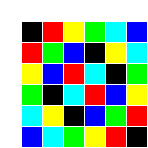

In [6]:
colormap = generate_colormap(n)
size_of_blocks = 20

grid = BlockGrid(n,n,(255,255,255),size_of_blocks)
for block in grid:
    block.rgb = colormap[action(block.row, block.col)]
    
print("Multiplication modulo {}".format(n))
grid.show_image()

# Addition mod n

What do your addition grids tell you about modular addition?

What do the white squares represent?

In [23]:
n = 16
def action(a, b):
    return (a + b)%n

Addition modulo 16


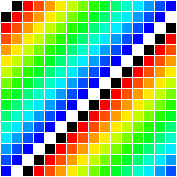

In [24]:
colormap = generate_colormap(n)
size_of_blocks = 10

grid = BlockGrid(n,n,(255,255,255),size_of_blocks)
for block in grid:
    block.rgb = colormap[action(block.row, block.col)]
    
print("Addition modulo {}".format(n))
grid.show_image()

Under addition, the white squares represent pairs of numbers that add to zero. And zero is the *identity* for addition.

$$13+3=0\mod16$$

In other words, $3$ is the *inverse* of $13$ under addition mod 16.

So the numbers $\{0,1,2,3,\ldots,15\}$ under addition mod $16$ are *closed*, have an *identity* $0$, and have *inverses*. This is a group!

Any other examples?

This is true for any modulus $n$.

The numbers $\{0,1,\ldots,n-1\}$ are a group under addition modulo $n$.

# Multiplication mod n

Can we find a group under multiplication mod n?

This situation is a bit more complicated. And interesting.

What have you noticed?

Can you have $0$ in a multiplication group?

No, $0$ doesn't have an inverse under multiplication.

Suppose $Z$ is the inverse of $0$, then $$Z\times0=1\mod n$$ because $1$ is the identity.

But $$Z\times0=0$$

So $$0\stackrel{?}{=}1$$

If we are going to find a group, it will just be the numbers $\{1,2,\ldots,n-1\}$, ignoring the white squares along the top and the left of the grid.

Do they form a group?

In [8]:
n=16
def action(a, b):
    return (a * b)%n

Multiplication modulo 16


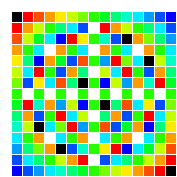

In [16]:
colormap=generate_colormap(n)

grid = BlockGrid(n,n,(255,255,255),10)
for block in grid:
    block.rgb = colormap[action(block.row, block.col)]
    
print("Multiplication modulo {}".format(n))
grid.show_image()

$\{1,2,\ldots,15\}$ **do not** form a group under multiplication mod 16.

You can tell because

* There isn't a black square in every row or column. Some numbers don't have inverses.
* There are white squares, zeroes. But we excluded zero, so it's not closed.

Can you find any numbers which do give a group?

In [19]:
n=17
def action(a, b):
    return (a * b)%n

Multiplication modulo 17


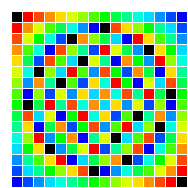

In [20]:
colormap=generate_colormap(n)

grid = BlockGrid(n,n,(255,255,255),10)
for block in grid:
    block.rgb = colormap[action(block.row, block.col)]
    
print("Multiplication modulo {}".format(n))
grid.show_image()

$\{1,2,\ldots,16\}$ **do** form a group under multiplication mod 17.

You can tell because

* There is a black square in every row or column. All numbers have inverses.
* There are no white squares.

Do you notice anything about the moduli that do give a group, and the ones that don't?

## Theorem

The numbers $\{1,2,\ldots,p-1\}$ form a group under multiplication mod $p$ if and only if $p$ is prime.

We won't prove this theorem fully today, but think about those white squares.

Make a multiplication grid mod 15. What's the connection between 15, and the pairs that multiply to 0?

In [21]:
n=15
def action(a, b):
    return (a * b)%n

Multiplication modulo 15


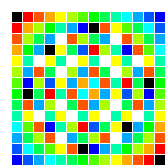

In [22]:
colormap=generate_colormap(n)

grid = BlockGrid(n,n,(255,255,255),10)
for block in grid:
    block.rgb = colormap[action(block.row, block.col)]
    
print("Multiplication modulo {}".format(n))
grid.show_image()

For example,
$$10\times6=0\mod 15$$

Because $$10\times6=2\times5\times2\times3=4\times15=0\mod 15$$

The factors of $15$ were hidden in the $10$ and $6$

That couldn't happen with a prime like $17$.

$\require{'cancel'}$

## The problem with zero divisors

Usually if both sides of an equation have a common factor, you can divide both sides by it

$$\begin{aligned}
5x&=15\\
\cancel{5}x &= \cancel{5}\times3\\
x&=3
\end{aligned}$$

Products that equal zero cause problems with this.

For example, $3$ is a zero divisor mod $6$ and

$$
\begin{aligned}
15&=3&&\mod6\\
3\times5&=3\times1 &&\mod 6\\
\text{But }5&\neq 1 &&\mod 6
\end{aligned}
$$

Cancelling doesn't work mod $6$. But it does work mod $7$.

This is because **zero divisors don't have inverses**.

There are no white squares on the same row or column as a black square.

**Zero divisors don't have inverses**

### Proof

Let $a$ and $b$ be zero divisors mod $n$.

In other words, neither $a$ nor $b$ is zero, but $ab=0\mod n$.

Suppose $a$ has an inverse $A$, so that $A\times a=1$

Then if

$$\begin{aligned}
ab &= 0&&\mod n\\
Aab &= A\times0&&\mod n\\
b &=0&&\mod n
\end{aligned}$$

But we said $b$ wasn't zero, so this is a contradiction. 

If you have an inverse, you're not a zero divisor. If you're a zero divisor, you don't have an inverse.

If you're multiplying modulo a prime number

* you don't get zero divisors
* so every number has an inverse
* and that means you've got a group